<a href="https://colab.research.google.com/github/VorobievAN/Pyton_basic/blob/main/_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 

In [ ]:
# 1. загрузка df +5
HR = pd.read_csv('HR.csv')
HR.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
HR_variables = HR[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']]

In [ ]:
# 2.Расчет: среднее (mean), мин/макс, медиана (50%), среднее отклонение (std) +10
HR[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']].describe ()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233
std,0.248631,0.171169,1.232592,49.943099,1.460136
min,0.090000,0.360000,2.000000,96.000000,2.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000


In [ ]:
""" 3. Рассчитайте и визуализировать корреляционную матрицу для
количественных переменных.
Определите две самые скоррелированные и две наименее
скоррелированные переменные. +10 """
HR.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


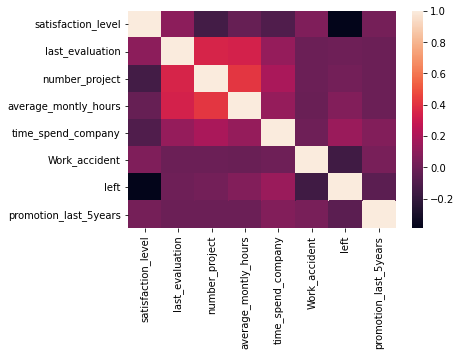

In [ ]:
import seaborn as sns
sns.heatmap(HR.corr())
# максимальная коррелиреляция: average_monthly_hours (кол-во часов на рабочем месте в месяц) /number_projects (кол-во выполненных проектов)
# минимальная корреляция: work_accident (несчастные случаи) / time_spend_company (стаж работы в компании)

In [ ]:
# 4. Cколько сотрудников работает в каждом департаменте +5
HR_work_empl = HR.loc[HR.left ==0] # только работающие сотрудники
HR_work_empl.department.value_counts()

sales          3126
technical      2023
support        1674
IT              954
product_mng     704
RandD           666
marketing       655
accounting      563
management      539
hr              524
Name: department, dtype: int64

In [ ]:
# 5. Распределение сотрудников по ЗП +5
HR_work_empl.salary.value_counts()

low       5144
medium    5129
high      1155
Name: salary, dtype: int64

In [ ]:
# 6. Распределение сотрудников по ЗП в каждом департаменте +5
HR_dep_sal = HR_work_empl.groupby(['department', 'salary']).count() 
HR_dep_sal['left']

department   salary
IT           high        79
             low        437
             medium     438
RandD        high        47
             low        309
             medium     310
accounting   high        69
             low        259
             medium     235
hr           high        39
             low        243
             medium     242
management   high       224
             low        121
             medium     194
marketing    high        71
             low        276
             medium     308
product_mng  high        62
             low        346
             medium     296
sales        high       255
             low       1402
             medium    1469
support      high       133
             low        757
             medium     784
technical    high       176
             low        994
             medium     853
Name: left, dtype: int64

In [ ]:
# 7. Проверка гипотезы, что сотрудники с высоким окладом проводят на работе больше времени, чем с низким
# Гипотеза подтверждена +10. Проверка на работающих сотрудниках.
HR_sal_hours = HR_work_empl.groupby('salary').mean() #расчитываем среднее значение по всем столбцам
HR_sal_hours['average_montly_hours'] #отображаем среднее значение по ЗП

salary
high      200.348052
low       198.617418
medium    199.214272
Name: average_montly_hours, dtype: float64

In [ ]:
"""8. Рассчитать следующие показатели среди уволившихся и не
уволившихся сотрудников (по отдельности):
- Средняя степень удовлетворенности
- Среднее количество проектов"""

HR_group= HR.groupby('left').agg({'satisfaction_level': 'mean', 'number_project': 'mean', 'promotion_last_5years': ['sum', len] })
HR_group

satisfaction_level number_project promotion_last_5years       
                   mean           mean                   sum    len
left                                                               
0              0.666810       3.786664                   300  11428
1              0.440098       3.855503                    19   3571

In [ ]:
# 8. Доля сотрудников с повышением за последние 5 лет +10
HR_group ['boosting_last_5years'] = HR_group['promotion_last_5years']['sum']/ HR_group['promotion_last_5years']['len']

In [ ]:
HR_group [['satisfaction_level','number_project', 'boosting_last_5years']]

,satisfaction_level,number_project,boosting_last_5years
,mean,mean,
left,,,
0,0.666810,3.786664,0.026251
1,0.440098,3.855503,0.005321
